In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [52]:
df = pd.read_csv("hf://datasets/animonte/train_house_price/train.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
missing_values = df.isna().sum()
print(missing_values)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [55]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


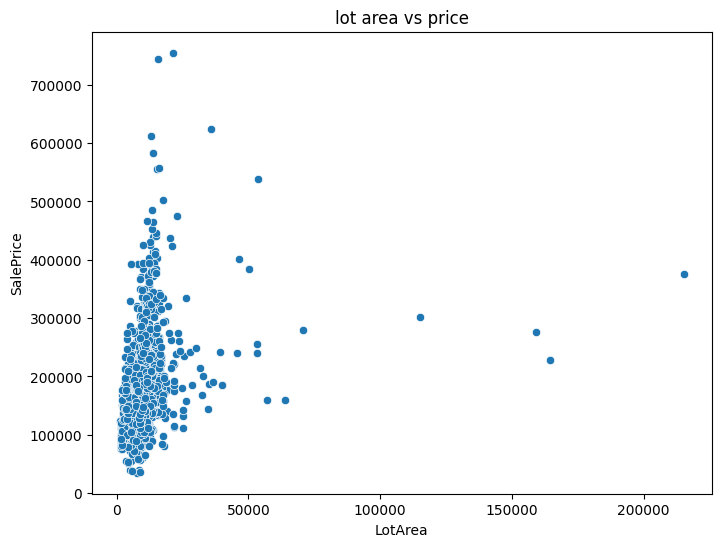

In [56]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df , x = 'LotArea' , y = 'SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('lot area vs price')
plt.show()

In [98]:
print(X_train.select_dtypes(include=['object']).columns)
ids = df.loc[X_test.index , 'Id']

Index([], dtype='object')


In [82]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [83]:
print(X_train.isnull().sum())

Id                         0
MSSubClass                 0
LotFrontage              217
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 243, dtype: int64


In [86]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [87]:
print(df['LotFrontage'].isnull().sum())

0


In [88]:
print(df.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
Street                   0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 95, dtype: int64


In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train , Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
y_predict = model.predict(X_test)

### from sklearn.metrics import mean_squared_error , r2_score
print("predicted prices:" , y_predict[:5])
print("RMSE:" , np.sqrt(mean_squared_error(Y_test , y_predict)))
print("R2 score:" , r2_score(Y_test , y_predict))

In [103]:
results = pd.DataFrame({
    'Id' : ids , 
    'Predicted Price' : y_predict
})

print(results.head())

        Id  Predicted Price
892    893        136321.00
1105  1106        320918.63
413    414        112939.75
522    523        158184.64
1036  1037        318514.55


In [107]:
results['Actual Price'] = Y_test.values
print(results.head())

        Id  Predicted Price  Actual Price
892    893        136321.00        154500
1105  1106        320918.63        325000
413    414        112939.75        115000
522    523        158184.64        159000
1036  1037        318514.55        315500


In [113]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

print("Predicted prices:", y_predict[:5])  
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_predict)))
print("mae:",  mean_absolute_error(Y_test, y_predict))
print("R2 Score:", r2_score(Y_test, y_predict))

Predicted prices: [136321.   320918.63 112939.75 158184.64 318514.55]
RMSE: 30158.681658513822
mae: 17738.132534246575
R2 Score: 0.8814201567428345
